## Training the model

Train the model using model.fit() function, and set the validation_split value, number of epochs,and bastch_size. Batch_size represents the size of data bins used to train the network, since with large volumes of data it cannot fit all onto your RAM at one time. An epoch is one iteration through the entire shuffled data set; with additional epochs, the data is reshuffled and used to train the network again. The validation split represents the fraction of the remaining training data to use as a validation set during the training.

In [ ]:
history = model.fit(X_train, y_train,
        verbose=2,
        batch_size=1024,
        validation_split=0.2,
        epochs=50)

After training the model, you can save the restule to you local directory using model.save() funciton.

In [ ]:
model.save('DGCNN')

## Evaluation

Now to validate the result, plot the learning curve: loss on the training set versus the loss on the validation set.

In [ ]:
import matplotlib.pyplot as plt
def learningCurve(history):
    plt.figure(figsize=(10,8))
    plt.plot(history.history['loss'], linewidth=1)
    plt.plot(history.history['val_loss'], linewidth=1)
    plt.title('Model Loss over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['training sample loss','validation sample loss'])
    #plt.savefig('Learning_curve.pdf')
    plt.show()
    plt.close()

In [ ]:
learningCurve(history)

Then plot the ROC curve.

In [ ]:
label = ['j_g','j_q','j_w','j_z','j_t']
def makeRoc(features_val, labels_val, labels, model, outputDir='', outputSuffix=''):
    from sklearn.metrics import roc_curve, auc
    labels_pred = model.predict(features_val)
    df = pd.DataFrame()
    fpr = {}
    tpr = {}
    auc1 = {}
    plt.figure(figsize=(10,8))       
    for i, label in enumerate(labels):
        df[label] = labels_val[:,i]
        df[label + '_pred'] = labels_pred[:,i]
        fpr[label], tpr[label], threshold = roc_curve(df[label],df[label+'_pred'])
        auc1[label] = auc(fpr[label], tpr[label])
        plt.plot(fpr[label],tpr[label],label='%s tagger, AUC = %.1f%%'%(label.replace('j_',''),auc1[label]*100.))
    plt.plot([0, 1], [0, 1], lw=1, color='black', linestyle='--')
    #plt.semilogy()
    plt.xlabel("Background Efficiency")
    plt.ylabel("Signal Efficiency")
    plt.xlim([-0.05, 1.05])
    plt.ylim(0.001,1.05)
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.figtext(0.25, 0.90,'DGCNN Curve',fontweight='bold', wrap=True, horizontalalignment='right', fontsize=14)
    #plt.figtext(0.35, 0.90,'preliminary', style='italic', wrap=True, horizontalalignment='center', fontsize=14) 
    #plt.savefig('%sROC_%s.pdf'%(outputDir, outputSuffix))
    return labels_pred

In [ ]:
y_pred = makeRoc(X_test, y_test, labels, model, outputSuffix='DGCNN')

The basic introduction of the learning curve and ROC curve is in the ML tutorial. If you still have any questions or concerns about what these graphs represent, we highly recommend you to go through the <a href="https://github.com/Chkoda/UW-EPE-ML-Tutorials">DNN tutorial<a> first.

Here is our result for DGCNN.

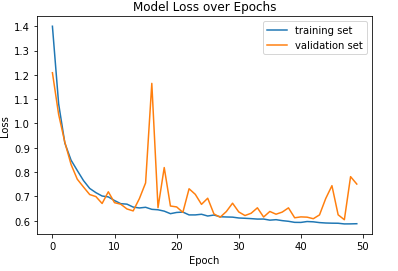

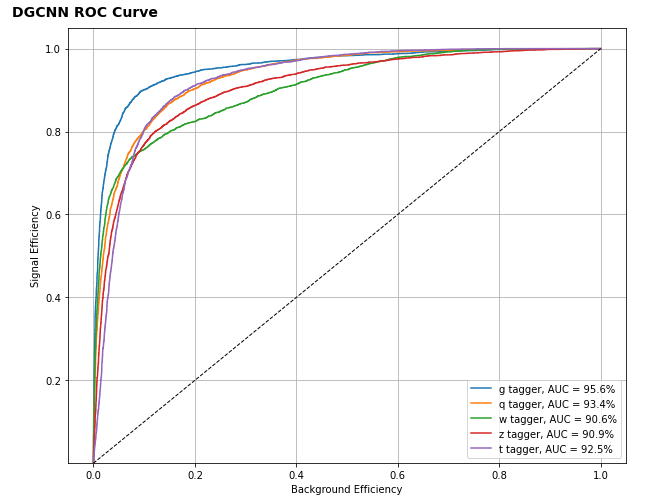

## Exercise

Train and plot the ROC curves and learning curves of the DGCNN using our five tagger data. You can find the data set <a href="https://cernbox.cern.ch/index.php/s/AgzB93y3ac0yuId?path=%2F">here</a>.Use Adam and categorical_crossentropy losses with the same parameters. 

After getting a reasonable learning curve and ROC curve, you can start to change and modify the parameters like learning rate and number of epochs, or even the hyperparameters inside the model. Find the best result from this DGCNN model with our data. And try to identify any anomalies and explain why it happens.